# Project Description

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

You need to: Prepare the data; Perform data analysis; Develop and train a model.

To complete the project, you may want to use documentation from pandas, matplotlib, and sklearn.
The next lesson is about the ore purification process. You will pick the information that is important for the model development.

# Initialization

In [3]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


# Load data

In [4]:
# Load the data files
try:
    df = pd.read_csv('/datasets/gold_recovery_train.csv')
except:
    train = pd.read_csv('gold_recovery_train.csv')
try:
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
except:
    test = pd.read_csv('gold_recovery_test.csv')
try:
    full = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    full = pd.read_csv('gold_recovery_full.csv')
    

# Explore the data

In [3]:
# Print general information about the 'train' dataframe
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [4]:
# Print a sample of the data for 'train'
train


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
# Print general information about the 'test' dataframe
test.info()
test.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [6]:
# Print a sample of the data for 'test'
test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [7]:
# Print general information about the 'full' dataframe
full.info()
full.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [8]:
# Print a sample of the data for 'full'
full


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [9]:
# Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature
train['recovery'] = (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) * 100


In [10]:
# Check the calculated 'recovery' column side by side with the 'rougher.output.recovery' column
recovery = train[['recovery', 'rougher.output.recovery']]
recovery


,recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


In [11]:
# Find the MAE between your calculations and the feature values
recovery.dropna(inplace = True)
mean_absolute_error(recovery['recovery'], recovery['rougher.output.recovery'])


9.303415616264301e-15

In [11]:
# reviewer's example
(train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - \
                                           train['rougher.output.tail_au'])) /\
(train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - \
                                   train['rougher.output.tail_au'])) * 100

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [12]:
# Analyze the features not available in the test set
train_columns = list(train.columns.difference(test.columns))
train_columns


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

Based on the above exploration, it appears that the recovery was indeed calculated correctly. The values that were calculated manually and the 'rougher.output.recovery' column show the same values and the very small MAE of 9.303415616264301e-15 further prove that the recovery values are accurate.

As for the features that are not available in the test set as shown in 'train_columns' above, the parameters appear to be outputs which represent product parameters. Because they are product parameters, they were excluded from the test set though they appear in the train set. However, for the purposes of this analysis, one output parameter must be chosen and included in the train set as the target. In this case, 'rougher.output.recovery' and 'final.output.recovery' and will be chosen as targets.

# Perform data preprocessing

In [13]:
# Remove the target ('final.output.recovery') from the list so it is not removed from the final train dataframe
train_columns.remove('final.output.recovery')
train_columns.remove('rougher.output.recovery')
train_columns


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'sec

In [14]:
# Drop the columns in the 'train_columns' list from the train set so the features match the test set
train = train.drop(train_columns, axis = 1)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   final.output.recovery                       15339 non-null  float64
 2   primary_cleaner.input.sulfate               15553 non-null  float64
 3   primary_cleaner.input.depressant            15598 non-null  float64
 4   primary_cleaner.input.feed_size             16860 non-null  float64
 5   primary_cleaner.input.xanthate              15875 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 10  primary_cl

In [15]:
# Fill in missing values from the train set with the median value for each column
train.fillna(train.median(), inplace = True)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   final.output.recovery                       16860 non-null  float64
 2   primary_cleaner.input.sulfate               16860 non-null  float64
 3   primary_cleaner.input.depressant            16860 non-null  float64
 4   primary_cleaner.input.feed_size             16860 non-null  float64
 5   primary_cleaner.input.xanthate              16860 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      16860 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    16860 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      16860 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    16860 non-null  float64
 10  primary_cl

In [16]:
# Fill in missing values from the test set with the median value for each column
test.fillna(test.median(), inplace = True)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

In [17]:
# Drop the 'date' feature from the train and test set
train = train.drop('date', axis = 1)
test = test.drop('date', axis = 1)


To prepare the data for analysis, the train set was cleaned so that it contains the same feature parameters as the test set as well as the target which is the 'final.output.recovery' column. Then the missing values in the train and test set were filled with median values in order to preserve as much data as possible. Median values were selected for filling in the missing values since they are less sensitive to extreme values like mean values may be. Finally, the 'date' feature was dropped from the train and test sets as they do not have relevance to the target in question.

# Analyze the data

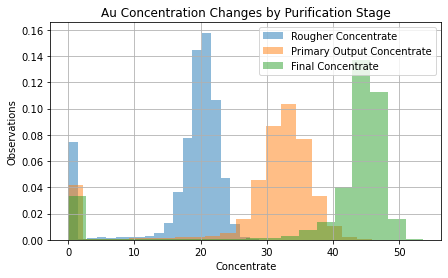

In [18]:
# Take note of how the concentrations of Au change depending on the purification stage

# Plot a histogram to visualize the changes
full['rougher.output.concentrate_au'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
full['primary_cleaner.output.concentrate_au'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
full['final.output.concentrate_au'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)

plt.title('Au Concentration Changes by Purification Stage')
plt.ylabel('Observations')
plt.xlabel('Concentrate')
plt.legend(['Rougher Concentrate', 'Primary Output Concentrate', 'Final Concentrate'])
plt.show()


The above histogram shows that the concentration of gold is lowest in the rougher concentrate, higher in the primary output concentrate, and highest in the final concentrate. This result is as expected since gold concentrations will logically get higher as it goes through more stages of purification and non-gold substances are filtered out.

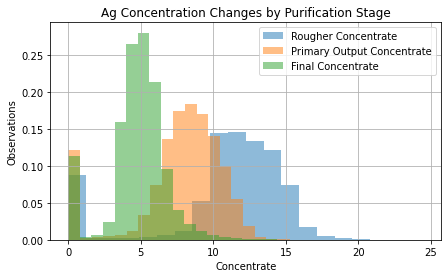

In [19]:
# Take note of how the concentrations of Ag change depending on the purification stage

# Plot a histogram to visualize the changes
full['rougher.output.concentrate_ag'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
full['primary_cleaner.output.concentrate_ag'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
full['final.output.concentrate_ag'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)

plt.title('Ag Concentration Changes by Purification Stage')
plt.ylabel('Observations')
plt.xlabel('Concentrate')
plt.legend(['Rougher Concentrate', 'Primary Output Concentrate', 'Final Concentrate'])
plt.show()


This histogram of silver concentrations depicts the opposite trend found in the gold concentrations. With each subsequent purification stage, the concentration of silver goes down which also makes sense since the process of gold purification will remove other substances such as silver at each purification stage.

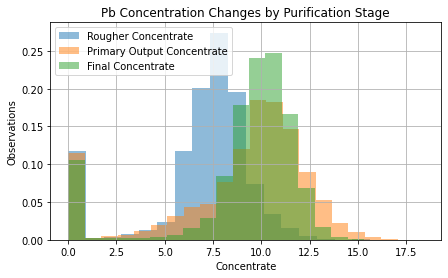

In [20]:
# Take note of how the concentrations of Pb change depending on the purification stage

# Plot a histogram to visualize the changes
full['rougher.output.concentrate_pb'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
full['primary_cleaner.output.concentrate_pb'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
full['final.output.concentrate_pb'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)

plt.title('Pb Concentration Changes by Purification Stage')
plt.ylabel('Observations')
plt.xlabel('Concentrate')
plt.legend(['Rougher Concentrate', 'Primary Output Concentrate', 'Final Concentrate'])
plt.show()


The result in the above histogram of lead concentration changes is a little more unusual than the other two graphs. It shows that the rougher concentrate had smaller concentrations than the primary output and final concentrates. However, while this may not necessarily be the expected result, it is possible that the process may not be as effective as it could be and could have had trouble filtering out lead in some instances, leading to the variations in lead concentrations that we see in the histogram. Since there does seem to be a clear pattern as opposed to random distributions of lead concentrations, the data for lead concentration will not be eliminated from the analysis.

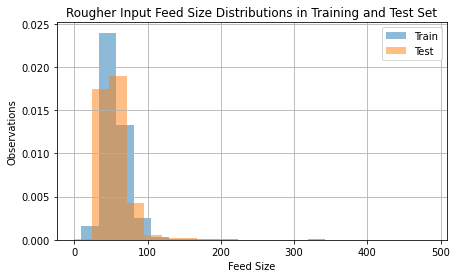

In [21]:
# Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect

# Plot a histogram to visualize the distributions
train['rougher.input.feed_size'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
test['rougher.input.feed_size'].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)

plt.title('Rougher Input Feed Size Distributions in Training and Test Set')
plt.ylabel('Observations')
plt.xlabel('Feed Size')
plt.legend(['Train', 'Test'])
plt.show()


Based on the above histogram of the feed particle size distributions in the training and test set, they seem to be relatively similar, indicating that the model evaluation will be valid.

# Build models

In [22]:
# Write a function to calculate the final sMAPE value.
def smape(estimator, features, target):
    pred = estimator.predict(features)
    return 1/len(target) * np.sum(2 * np.abs(pred - target) / (np.abs(target) + np.abs(pred))*100)


In [23]:
# Create the features and target variables that will be used for the following models to predict 'final.output.recovery'
features = train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1) # The features consists of all the columns except 'final.output.recovery' and 'rougher.output.recovery'
target_final = train['final.output.recovery'] # The target is the 'final.output.recovery' column


In [24]:
# Normalize the numeric features to ensure that the data is appropriately scaled
scaler = StandardScaler()
scaler.fit(features)
features[features.columns] = scaler.transform(features[features.columns])
test[test.columns] = scaler.transform(test[test.columns])


In [25]:
# Create a function that will calculate the cross-validation sMAPE values for Linear Regression, Decision Tree Regression, and Random Forest Regression Models
def cross_val_model(model_name, features, target, num_params=2, start_params=1, random_state=12345, cv=5, scoring=smape):
    best_model = None
    best_param = 0 
    best_score = float('Inf')
    for param in range(start_params, num_params):
        if model_name == 'Linear Regression':
            model = LinearRegression() # initialize model constructor
        elif model_name == 'Decision Tree Regression':
            model = DecisionTreeRegressor(random_state = random_state, max_depth = param) # create a model with the given depth
        elif model_name == 'Random Forest Regression':
            model = RandomForestRegressor(random_state = random_state, n_estimators = param) # set number of trees
        cv_scores = cross_val_score(model, features, target, cv = cv, scoring = smape)
        score = cv_scores.mean()
        if score < best_score: # identify the best model based on sMAPE value
            best_score = score
            best_model = model 
            best_param = param
        
    print(f'Cross Validation (sMAPE) Score: {best_score}')
    print(f'Best Param: {best_param}')
    return best_model
            

## Linear Regression (final.output.recovery)

In [26]:
# Use the cross_val_model function to get the sMAPE for a Linear Regression model
final_lr_model = cross_val_model('Linear Regression', features, target_final)


Cross Validation (sMAPE) Score: 13.006911806902465
Best Param: 1


## Decision Tree Regression (final.output.recovery)

In [27]:
# Use the cross_val_model function to get the sMAPE for a Decision Tree Regression model
final_dtr_model = cross_val_model('Decision Tree Regression', features, target_final, num_params=11)


Cross Validation (sMAPE) Score: 11.643230837174208
Best Param: 2


## Random Forest Regression (final.output.recovery)

In [28]:
# Use the cross_val_model function to get the sMAPE for a Random Forest Regression model
final_rfr_model = cross_val_model('Random Forest Regression', features, target_final, start_params=20, num_params=21)


Cross Validation (sMAPE) Score: 12.98359137470008
Best Param: 20


In [29]:
# Create the features and target variables that will be used for the following models to predict 'rougher.output.recovery'
features = train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1) # The features consists of all the columns except 'final.output.recovery' and 'rougher.output.recovery'
target_rougher = train['rougher.output.recovery'] # The target is the 'rougher.output.recovery' column


In [30]:
# Normalize the numeric features to ensure that the data is appropriately scaled
scaler = StandardScaler()
scaler.fit(features)
features[features.columns] = scaler.transform(features[features.columns])


## Linear Regression (rougher.output.recovery)

In [31]:
# Use the cross_val_model function to get the sMAPE for a Linear Regression model
rougher_lr_model = cross_val_model('Linear Regression', features, target_rougher)


Cross Validation (sMAPE) Score: 11.215213323227042
Best Param: 1


## Decision Tree Regressor (rougher.output.recovery)

In [32]:
# Use the cross_val_model function to get the sMAPE for a Decision Tree Regression model
rougher_dtr_model = cross_val_model('Decision Tree Regression', features, target_rougher, num_params=11)



Cross Validation (sMAPE) Score: 10.918664752387535
Best Param: 3


## Random Forest Regressor (rougher.output.recovery)

In [33]:
# Use the cross_val_model function to get the sMAPE for a Random Forest Regression model
rougher_rfr_model = cross_val_model('Random Forest Regression', features, target_rougher, start_params=20, num_params=21)


Cross Validation (sMAPE) Score: 13.025611608365242
Best Param: 20


In [34]:
# Test the Decision Tree Model (which had the best sMAPE for both the rougher and final output targets) using the test sample for final.output.recovery
final_model = DecisionTreeRegressor(random_state = 12345, max_depth = 2)
final_model.fit(features, target_final)
final_pred = pd.DataFrame(final_model.predict(test))
final_pred.describe()


,0
count,5856.000000
mean,68.656704
std,2.613116
min,57.859450
25%,69.550915
50%,69.550915
75%,69.550915
max,91.657493


In [35]:
# Test the Decision Tree Model (which had the best sMAPE for both the rougher and final output targets) using the test sample for rougher.output.recovery
rougher_model = DecisionTreeRegressor(random_state = 12345, max_depth = 3)
rougher_model.fit(features, target_rougher)
rougher_pred = pd.DataFrame(rougher_model.predict(test))
rougher_pred.describe()


,0
count,5856.000000
mean,81.863459
std,7.396100
min,14.895017
25%,83.521127
50%,83.521127
75%,83.521127
max,88.585625


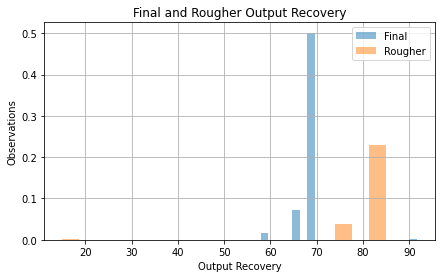

In [36]:
# Plot a histogram to visualize the distribution
final_pred[0].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)
rougher_pred[0].hist(bins=20, figsize=(7, 4), alpha=.5, density=True)

plt.title('Final and Rougher Output Recovery')
plt.ylabel('Observations')
plt.xlabel('Output Recovery')
plt.legend(['Final', 'Rougher'])
plt.show()


Based on the predictions of the Decision Tree models, the predicted final output values were lower than that of the predicted rougher output values. The mean value for final output was 68.7 while the mean value for the rougher output was 81.9. Although the expectation was for the final output values to be higher than that of the rougher output, perhaps there is a reason within the technical process of gold refinement that causes the rougher concentrations to be higher than the final concentrations.